In [1]:
import pandas as pd
A=pd.read_csv("/users/ravi/desktop/datasets/HR-Employee-Attrition.csv")

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
A.head(3)


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Missing Data

In [5]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
Y = A[["MonthlyRate"]]
X = A.drop(labels=["MonthlyRate"],axis=1)

# Exploratory Data Analysis

In [7]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [8]:
con

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
len(con)

26

In [10]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
len(cat)

8

# Univariate analysis

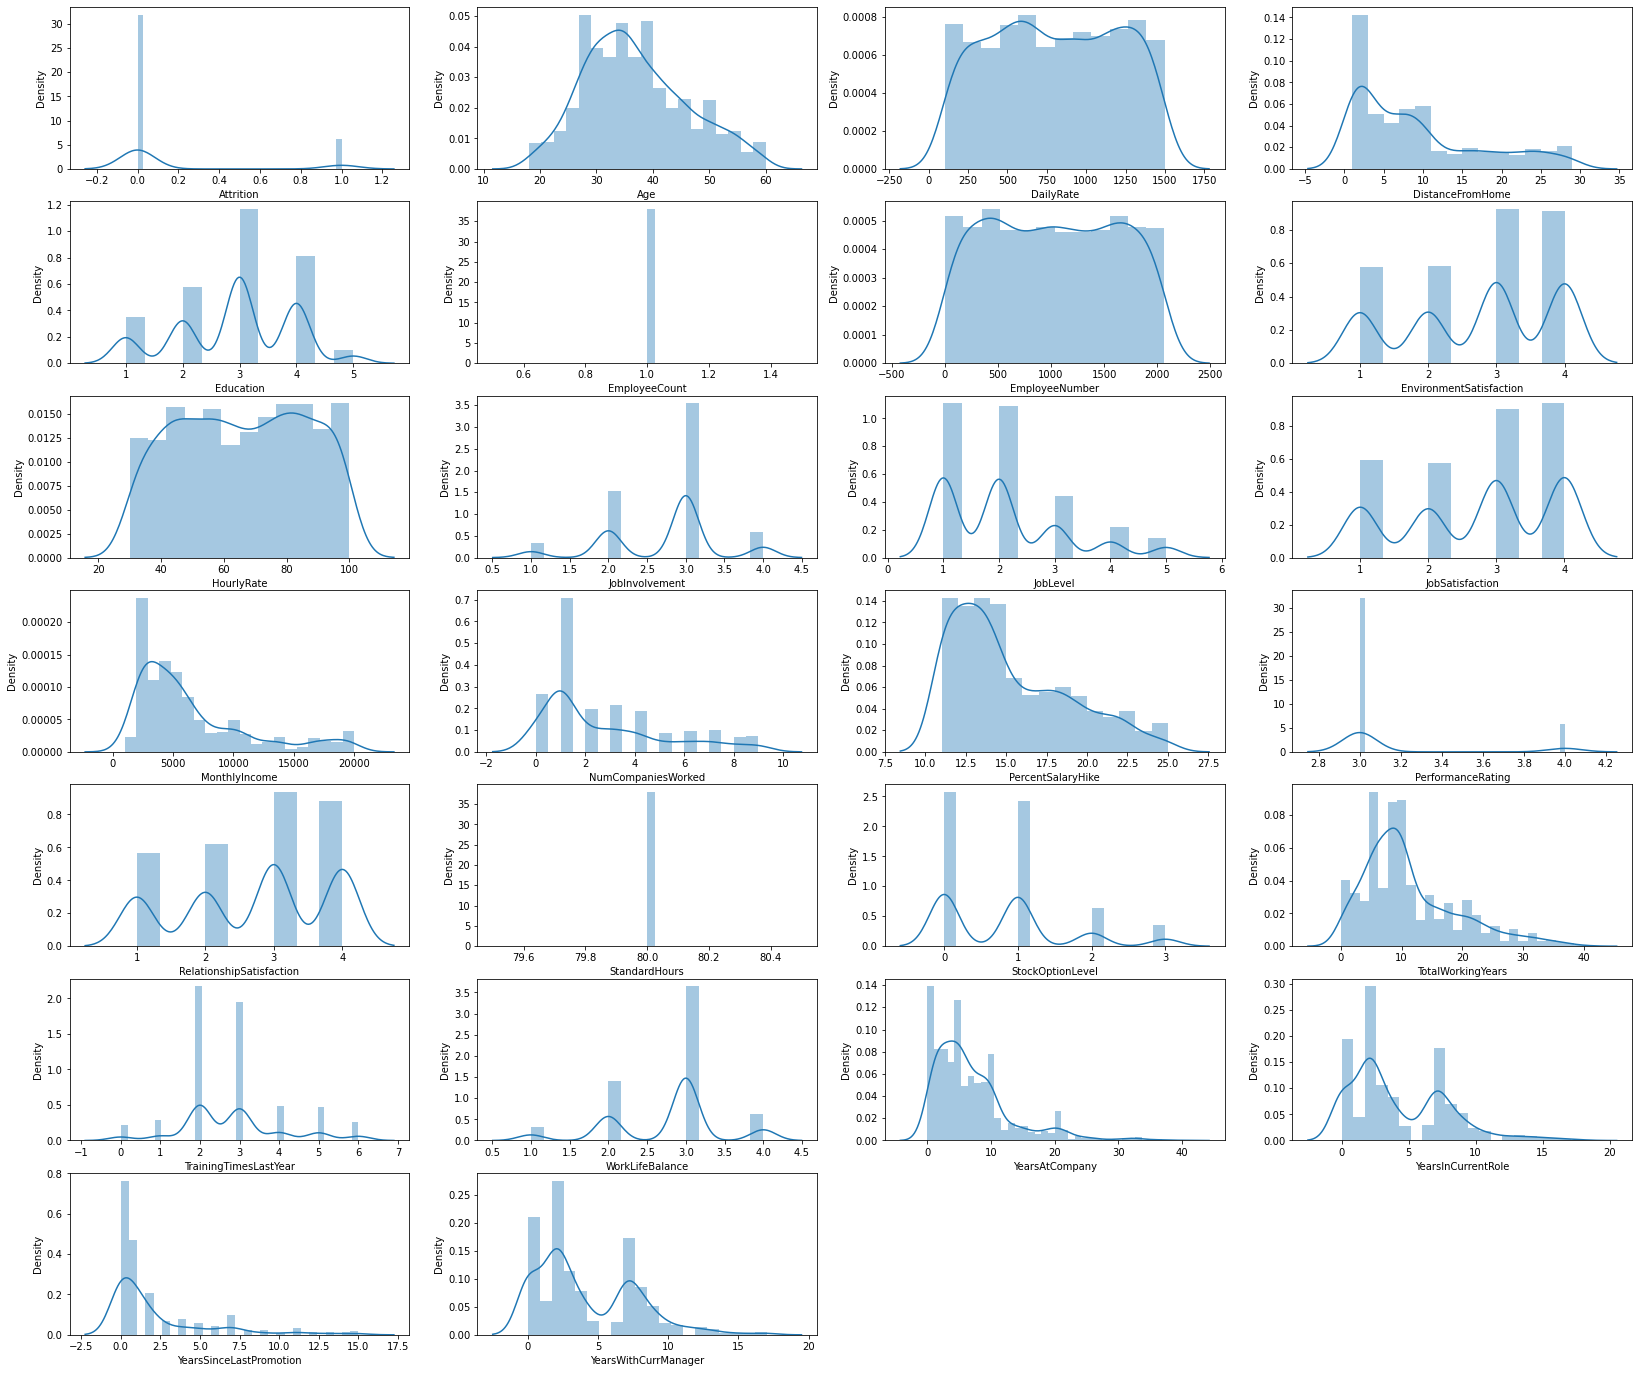

In [12]:
nrows=len(con)/3
import matplotlib.pyplot as plt
from seaborn import distplot
import warnings
warnings.filterwarnings('ignore')
w=1
plt.figure(figsize=[28,28])
for i in con:
    plt.subplot(nrows,4,w)
    distplot(A[i])
    w=w+1

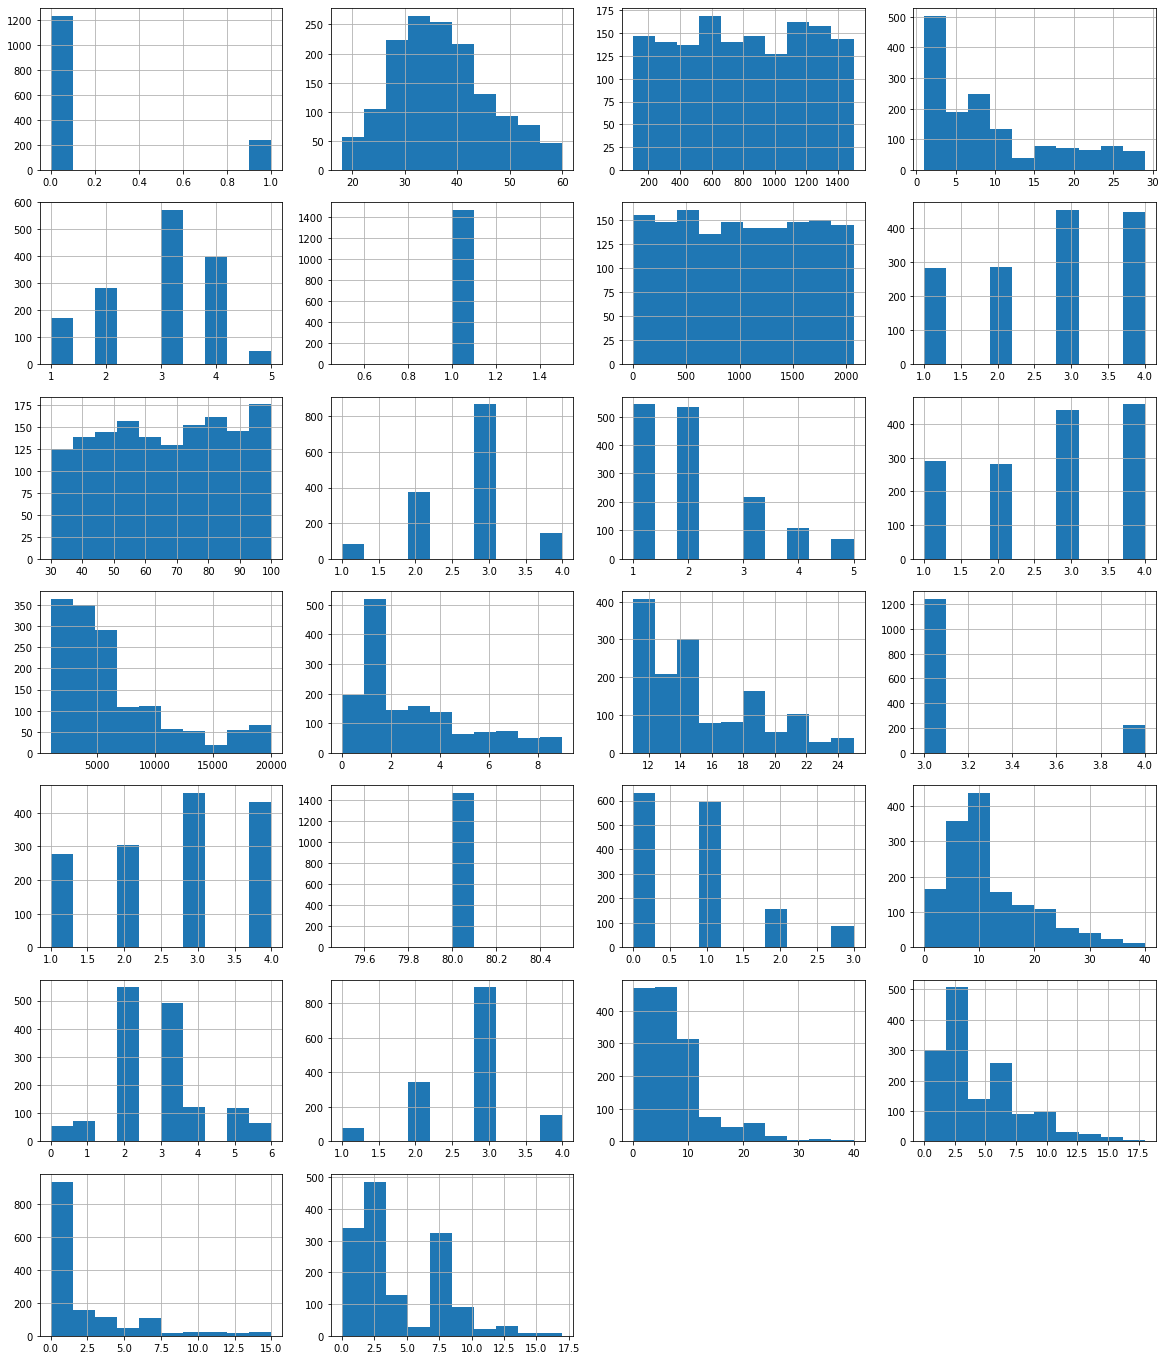

In [13]:
w=1
plt.figure(figsize=[20,28])
for i in con:
    plt.subplot(nrows,4,w)
    A[i].hist()
    w=w+1

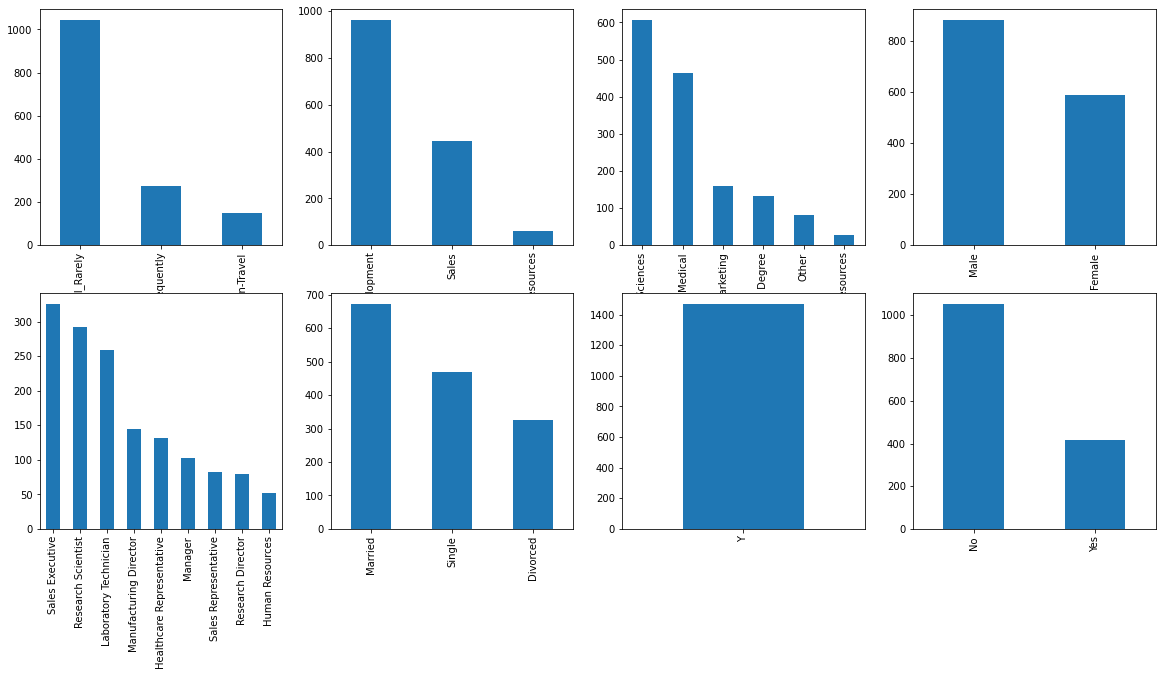

In [14]:
nrows=round(len(cat)/3,0)+1
w=1
plt.figure(figsize=[20,20])
for i in cat:
    plt.subplot(nrows,4,w)
    A[i].value_counts().plot(kind="bar")
    w=w+1

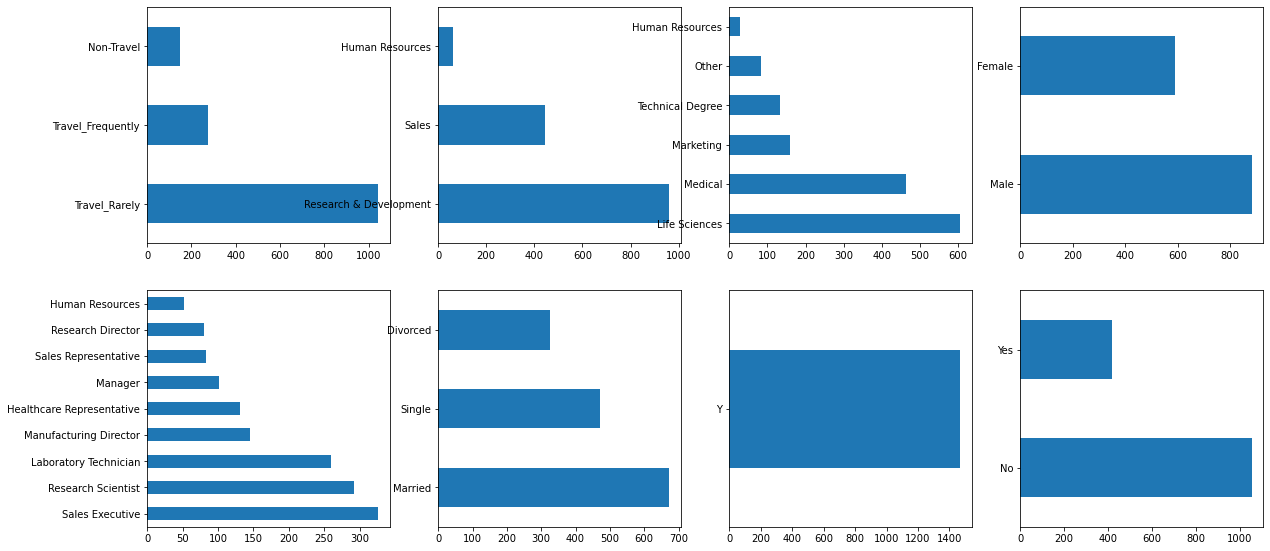

In [15]:
w=1
plt.figure(figsize=[20,20])

for i in cat:
    plt.subplot(nrows,4,w)
    A[i].value_counts().plot(kind="barh")
    w=w+1

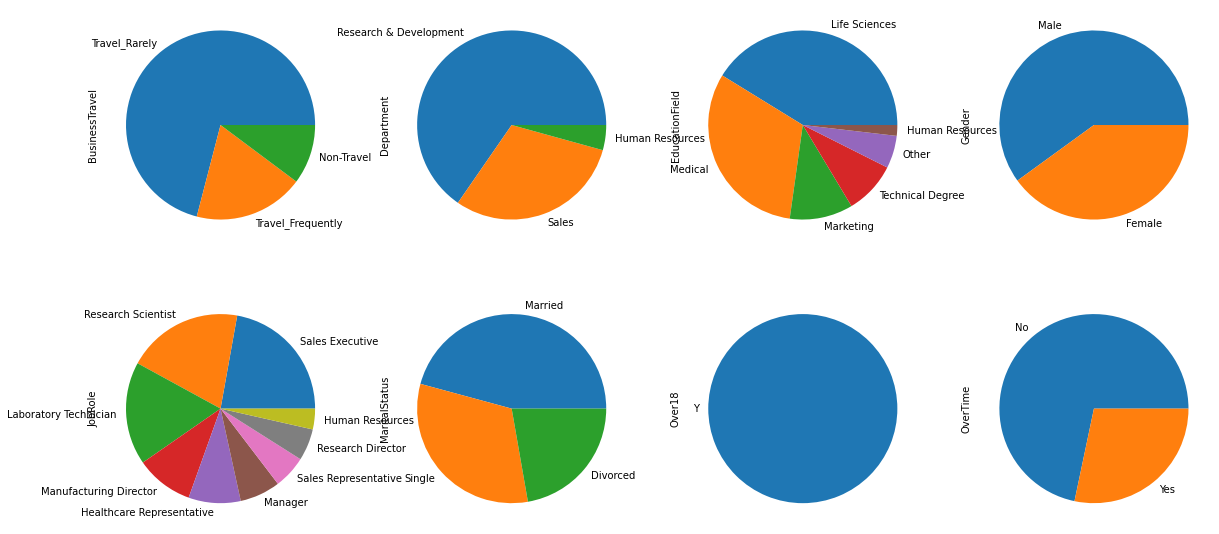

In [16]:
w=1
plt.figure(figsize=[20,20])

for i in cat:
    plt.subplot(nrows,4,w)
    A[i].value_counts().plot(kind="pie")
    w=w+1

# Bivariate analysis

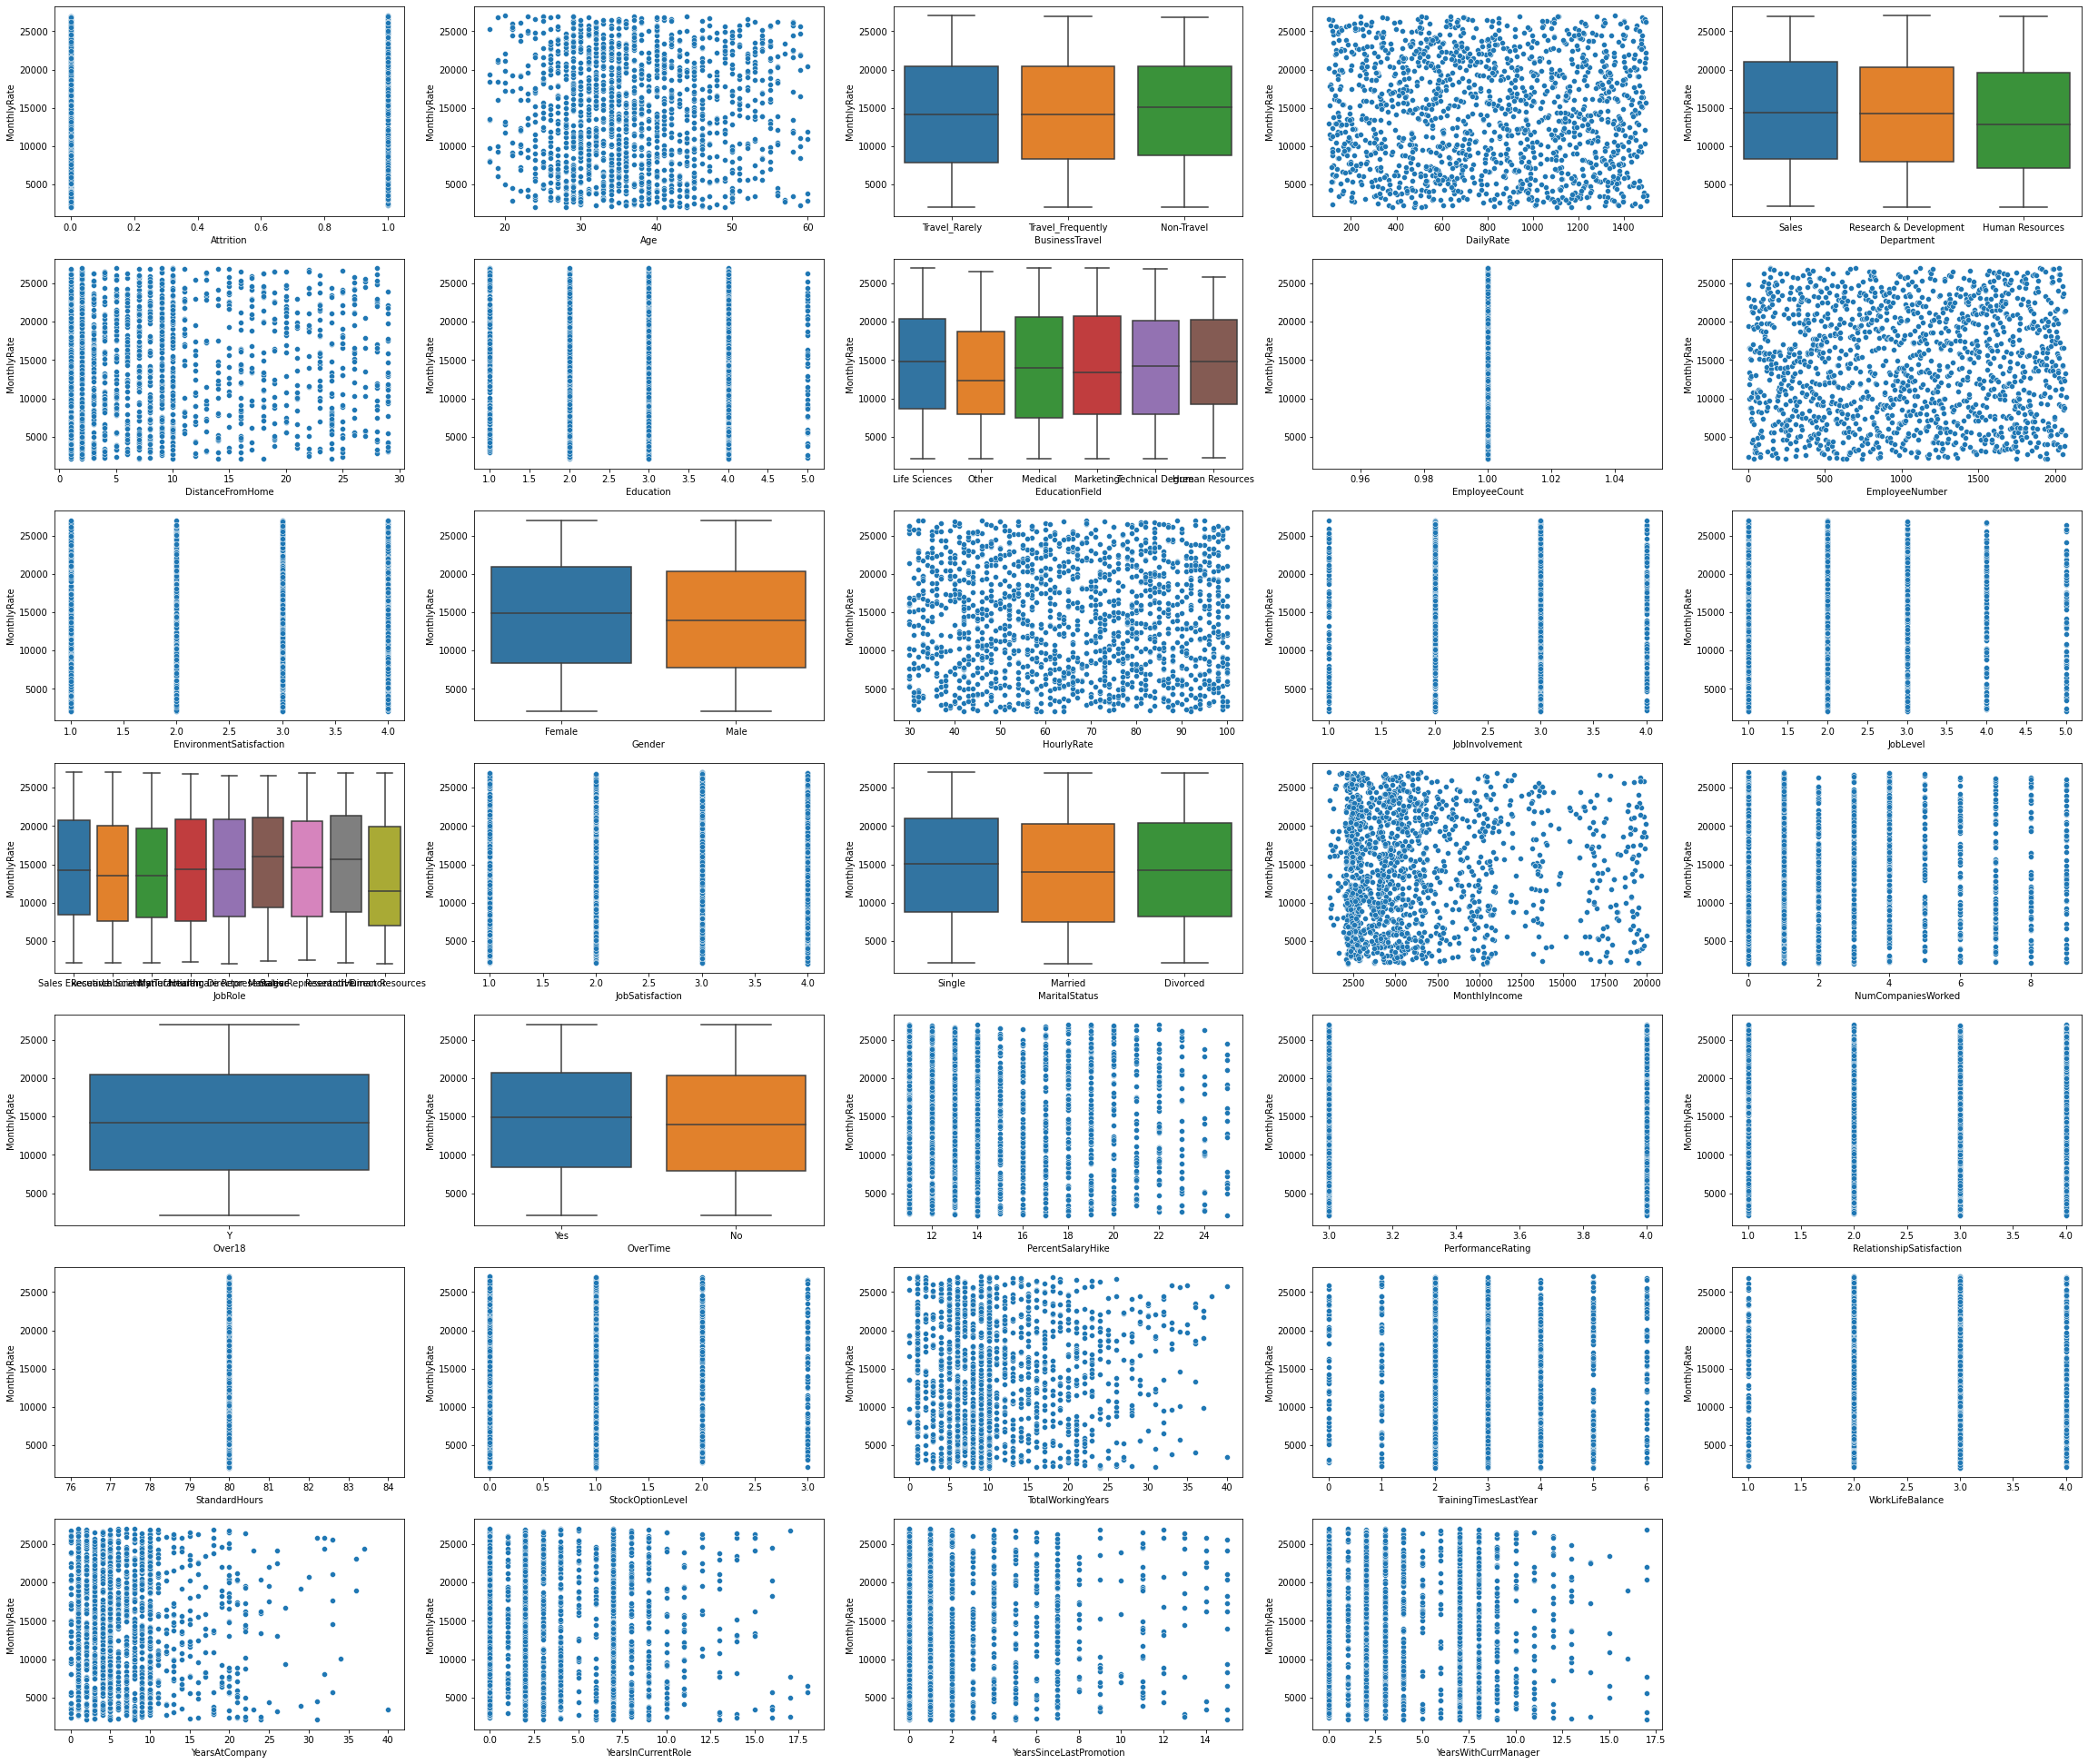

In [17]:
X = A.drop(["MonthlyRate"], axis=1)
Y = A[["MonthlyRate"]]

import seaborn as sns
import matplotlib.pyplot as plt
x = 1
plt.figure(figsize=(40,40))
for i in X.columns:
    if X[i].dtypes == 'object':
        plt.subplot(8,5,x)
        sns.boxplot(X[i],Y['MonthlyRate'])
        x = x + 1
    else:
        plt.subplot(8,5,x)
        sns.scatterplot(X[i], Y['MonthlyRate'])
        x=x+1

# ANOVA

In [18]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [19]:
imp_con_cols = []
for i in cat:
    print("--------MonthlyRate vs",i,"----------")
    x = ANOVA(A,i,"MonthlyRate")
    print(x)
    if(x < 0.05):
        imp_con_cols.append(i)

--------MonthlyRate vs BusinessTravel ----------
0.838
--------MonthlyRate vs Department ----------
0.57
--------MonthlyRate vs EducationField ----------
0.753
--------MonthlyRate vs Gender ----------
0.112
--------MonthlyRate vs JobRole ----------
0.779
--------MonthlyRate vs MaritalStatus ----------
0.31
--------MonthlyRate vs Over18 ----------
nan
--------MonthlyRate vs OverTime ----------
0.412


In [20]:
imp_con_cols.append("Gender")

In [21]:
A.corr()["MonthlyRate"].sort_values()

YearsWithCurrManager       -0.036746
StockOptionLevel           -0.034323
DailyRate                  -0.032182
Education                  -0.026084
YearsAtCompany             -0.023655
JobInvolvement             -0.016322
HourlyRate                 -0.015297
YearsInCurrentRole         -0.012815
PerformanceRating          -0.009811
PercentSalaryHike          -0.006429
RelationshipSatisfaction   -0.004085
JobSatisfaction             0.000644
TrainingTimesLastYear       0.001467
YearsSinceLastPromotion     0.001567
WorkLifeBalance             0.007963
EmployeeNumber              0.012648
Attrition                   0.015170
NumCompaniesWorked          0.017521
TotalWorkingYears           0.026442
DistanceFromHome            0.027473
Age                         0.028051
MonthlyIncome               0.034814
EnvironmentSatisfaction     0.037600
JobLevel                    0.039563
MonthlyRate                 1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

# Preprocessing

In [22]:
def preprocessing(X):
    import pandas as pd
    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes =='object'):
            cat.append(i)
        else:
            con.append(i)

    X1 = pd.get_dummies(X[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

    X3 = X2.join(X1)
    return X3

In [23]:
X=preprocessing(X)


In [24]:
X = A[["JobLevel"]]

# Split the data in training and testing set

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

# SLR model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,explained_variance_score

def model(mobj):
    model = mobj.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    tr_acc = mean_absolute_error(ytrain,pred_tr)
    pred_ts = model.predict(xtest)
    ts_acc = mean_absolute_error(ytest,pred_ts)
    exp_var = explained_variance_score(ytest,pred_ts)
    return round(tr_acc,3),round(ts_acc,3),exp_var,mobj


In [27]:
lm = LinearRegression()
model(lm)

(6164.147, 6265.515, 0.004169958769105198, LinearRegression())

# DTR

In [28]:
X = A.drop(labels=["MonthlyRate"],axis=1)
Xnew = preprocessing(X)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [29]:
from sklearn.tree import DecisionTreeRegressor

Q = []
for i in range(2,20):
    dtr = DecisionTreeRegressor(random_state=21,max_depth=i)
    Q.append(model(dtr))

In [30]:
Q

[(6074.345,
  6332.767,
  -0.04170664128709212,
  DecisionTreeRegressor(max_depth=2, random_state=21)),
 (6000.14,
  6345.39,
  -0.06116753684483922,
  DecisionTreeRegressor(max_depth=3, random_state=21)),
 (5861.491,
  6329.589,
  -0.055290678789388314,
  DecisionTreeRegressor(max_depth=4, random_state=21)),
 (5688.867,
  6495.855,
  -0.14836418881872437,
  DecisionTreeRegressor(max_depth=5, random_state=21)),
 (5407.625,
  6622.983,
  -0.2287788602321692,
  DecisionTreeRegressor(max_depth=6, random_state=21)),
 (5008.309,
  7006.381,
  -0.38974225825748676,
  DecisionTreeRegressor(max_depth=7, random_state=21)),
 (4497.233,
  7216.831,
  -0.4659154028696886,
  DecisionTreeRegressor(max_depth=8, random_state=21)),
 (4039.262,
  7300.052,
  -0.5451347991067017,
  DecisionTreeRegressor(max_depth=9, random_state=21)),
 (3437.394,
  7696.496,
  -0.728536404056936,
  DecisionTreeRegressor(max_depth=10, random_state=21)),
 (2848.33,
  7647.737,
  -0.7416852962248524,
  DecisionTreeRegressor

# RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

Q = []
for i in range(2,20):
    rf = RandomForestRegressor(random_state=21,n_estimators=i)
    Q.append(model(rf))
    
Q

[(2878.443,
  7460.903,
  -0.580553205050812,
  RandomForestRegressor(n_estimators=2, random_state=21)),
 (2808.111,
  6742.627,
  -0.29557346424729825,
  RandomForestRegressor(n_estimators=3, random_state=21)),
 (2742.051,
  6824.177,
  -0.30296007071417375,
  RandomForestRegressor(n_estimators=4, random_state=21)),
 (2660.387,
  6842.777,
  -0.27611885943552816,
  RandomForestRegressor(n_estimators=5, random_state=21)),
 (2655.097,
  6685.397,
  -0.23089261200254563,
  RandomForestRegressor(n_estimators=6, random_state=21)),
 (2620.461,
  6557.2,
  -0.1673556829364653,
  RandomForestRegressor(n_estimators=7, random_state=21)),
 (2583.765,
  6576.727,
  -0.16431798877963066,
  RandomForestRegressor(n_estimators=8, random_state=21)),
 (2546.882,
  6478.502,
  -0.1166255257443587,
  RandomForestRegressor(n_estimators=9, random_state=21)),
 (2526.111,
  6484.632,
  -0.11079524296106724,
  RandomForestRegressor(n_estimators=10, random_state=21)),
 (2515.767,
  6439.59,
  -0.08764971574327

# AdaBoostRegressor

In [32]:
from sklearn.ensemble import AdaBoostRegressor

Q = []
for i in range(20,40):
    abc = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3, random_state=21),n_estimators=i)
    Q.append(model(abc))
    
Q

[(6052.221,
  6228.604,
  0.010323224903073136,
  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                         random_state=21),
                    n_estimators=20)),
 (6066.883,
  6254.328,
  0.006603781500780004,
  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                         random_state=21),
                    n_estimators=21)),
 (6068.928,
  6248.728,
  0.0022831594006053058,
  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                         random_state=21),
                    n_estimators=22)),
 (6083.072,
  6286.209,
  -0.003947160111808401,
  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                         random_state=21),
                    n_estimators=23)),
 (6007.229,
  6190.001,
  0.016626442156442378,
  AdaBoostRegressor(ba

# take new predictor

In [33]:
import pandas as pd
A=pd.read_csv("/users/ravi/desktop/datasets/HR-Employee-Attrition.csv")

In [34]:
A.head(3)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [35]:
Y = A[["Attrition"]]
X = A.drop(labels=["Attrition"],axis=1)

In [36]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [37]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [38]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [39]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [40]:
imp_con_cols = []
for i in con:
    print("--------Attrition vs",i,"----------")
    x = ANOVA(A,"Attrition",i)
    print(x)
    if(x < 0.05):
        imp_con_cols.append(i)

--------Attrition vs Age ----------
0.0
--------Attrition vs DailyRate ----------
0.03
--------Attrition vs DistanceFromHome ----------
0.003
--------Attrition vs Education ----------
0.229
--------Attrition vs EmployeeCount ----------
0.403
--------Attrition vs EmployeeNumber ----------
0.685
--------Attrition vs EnvironmentSatisfaction ----------
0.0
--------Attrition vs HourlyRate ----------
0.793
--------Attrition vs JobInvolvement ----------
0.0
--------Attrition vs JobLevel ----------
0.0
--------Attrition vs JobSatisfaction ----------
0.0
--------Attrition vs MonthlyIncome ----------
0.0
--------Attrition vs MonthlyRate ----------
0.561
--------Attrition vs NumCompaniesWorked ----------
0.096
--------Attrition vs PercentSalaryHike ----------
0.606
--------Attrition vs PerformanceRating ----------
0.912
--------Attrition vs RelationshipSatisfaction ----------
0.079
--------Attrition vs StandardHours ----------
0.212
--------Attrition vs StockOptionLevel ----------
0.0
--------Att

In [41]:
imp_con_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [42]:
for i in cat:
    print("----------Attrition vs",i,"----------\n")
    print(pd.crosstab(A.Attrition,A[i]))
    print("\n")

----------Attrition vs BusinessTravel ----------

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      138                208            887
1                       12                 69            156


----------Attrition vs Department ----------

Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92


----------Attrition vs EducationField ----------

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
0                            20            517        124      401     71   
1                             7             89         35       63     11   

EducationField  Technical Degree  
Attrition                 

In [43]:
imp_con_cols.extend(["OverTime","Gender"])
imp_con_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'OverTime',
 'Gender']

In [47]:
[imp_con_cols]

[['Age',
  'DailyRate',
  'DistanceFromHome',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsWithCurrManager',
  'OverTime',
  'Gender']]

In [50]:
from PM88 import preprocessing
Xnew = preprocessing(X[imp_con_cols])


# Split the data in training and testing set¶


In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def model(mobj):
    model = mobj.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    tr_acc = accuracy_score(ytrain,pred_tr)
    pred_ts = model.predict(xtest)
    ts_acc = accuracy_score(ytest,pred_ts)
    return round(tr_acc,3),round(ts_acc,3),mobj


In [55]:
lr = LogisticRegression()
model(lr)

(0.862, 0.878, LogisticRegression())

# DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
Q = []
for i in range(2,20):
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    Q.append(model(dtc))
Q    

[(0.843, 0.85, DecisionTreeClassifier(max_depth=2, random_state=21)),
 (0.861, 0.864, DecisionTreeClassifier(max_depth=3, random_state=21)),
 (0.874, 0.844, DecisionTreeClassifier(max_depth=4, random_state=21)),
 (0.895, 0.847, DecisionTreeClassifier(max_depth=5, random_state=21)),
 (0.914, 0.854, DecisionTreeClassifier(max_depth=6, random_state=21)),
 (0.929, 0.84, DecisionTreeClassifier(max_depth=7, random_state=21)),
 (0.94, 0.827, DecisionTreeClassifier(max_depth=8, random_state=21)),
 (0.952, 0.786, DecisionTreeClassifier(max_depth=9, random_state=21)),
 (0.969, 0.82, DecisionTreeClassifier(max_depth=10, random_state=21)),
 (0.982, 0.806, DecisionTreeClassifier(max_depth=11, random_state=21)),
 (0.99, 0.806, DecisionTreeClassifier(max_depth=12, random_state=21)),
 (0.995, 0.793, DecisionTreeClassifier(max_depth=13, random_state=21)),
 (0.998, 0.796, DecisionTreeClassifier(max_depth=14, random_state=21)),
 (0.999, 0.796, DecisionTreeClassifier(max_depth=15, random_state=21)),
 (1.0

In [58]:
Q = []
for i in range(2,20):
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    Q.append(model(dtc))
Q    

[(0.966, 0.827, DecisionTreeClassifier(min_samples_leaf=2, random_state=21)),
 (0.945, 0.827, DecisionTreeClassifier(min_samples_leaf=3, random_state=21)),
 (0.929, 0.83, DecisionTreeClassifier(min_samples_leaf=4, random_state=21)),
 (0.918, 0.796, DecisionTreeClassifier(min_samples_leaf=5, random_state=21)),
 (0.906, 0.813, DecisionTreeClassifier(min_samples_leaf=6, random_state=21)),
 (0.903, 0.796, DecisionTreeClassifier(min_samples_leaf=7, random_state=21)),
 (0.901, 0.806, DecisionTreeClassifier(min_samples_leaf=8, random_state=21)),
 (0.89, 0.813, DecisionTreeClassifier(min_samples_leaf=9, random_state=21)),
 (0.883, 0.816, DecisionTreeClassifier(min_samples_leaf=10, random_state=21)),
 (0.883, 0.816, DecisionTreeClassifier(min_samples_leaf=11, random_state=21)),
 (0.879, 0.813, DecisionTreeClassifier(min_samples_leaf=12, random_state=21)),
 (0.877, 0.823, DecisionTreeClassifier(min_samples_leaf=13, random_state=21)),
 (0.874, 0.83, DecisionTreeClassifier(min_samples_leaf=14, ran

In [60]:
Q = []
for i in range(2,20):
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    Q.append(model(dtc))            

In [61]:
Q

[(1.0, 0.796, DecisionTreeClassifier(random_state=21)),
 (0.995, 0.796, DecisionTreeClassifier(min_samples_split=3, random_state=21)),
 (0.989, 0.793, DecisionTreeClassifier(min_samples_split=4, random_state=21)),
 (0.974, 0.81, DecisionTreeClassifier(min_samples_split=5, random_state=21)),
 (0.966, 0.803, DecisionTreeClassifier(min_samples_split=6, random_state=21)),
 (0.957, 0.803, DecisionTreeClassifier(min_samples_split=7, random_state=21)),
 (0.949, 0.816, DecisionTreeClassifier(min_samples_split=8, random_state=21)),
 (0.943, 0.816, DecisionTreeClassifier(min_samples_split=9, random_state=21)),
 (0.94, 0.827, DecisionTreeClassifier(min_samples_split=10, random_state=21)),
 (0.937, 0.823, DecisionTreeClassifier(min_samples_split=11, random_state=21)),
 (0.933, 0.823, DecisionTreeClassifier(min_samples_split=12, random_state=21)),
 (0.923, 0.816, DecisionTreeClassifier(min_samples_split=13, random_state=21)),
 (0.923, 0.816, DecisionTreeClassifier(min_samples_split=14, random_state

# RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
Q = []
for i in range(2,20):
    rf = RandomForestClassifier(random_state=21,n_estimators=i)
    Q.append(model(rf))
    
Q

[(0.93, 0.847, RandomForestClassifier(n_estimators=2, random_state=21)),
 (0.961, 0.837, RandomForestClassifier(n_estimators=3, random_state=21)),
 (0.949, 0.871, RandomForestClassifier(n_estimators=4, random_state=21)),
 (0.968, 0.857, RandomForestClassifier(n_estimators=5, random_state=21)),
 (0.957, 0.874, RandomForestClassifier(n_estimators=6, random_state=21)),
 (0.979, 0.874, RandomForestClassifier(n_estimators=7, random_state=21)),
 (0.968, 0.878, RandomForestClassifier(n_estimators=8, random_state=21)),
 (0.986, 0.878, RandomForestClassifier(n_estimators=9, random_state=21)),
 (0.98, 0.867, RandomForestClassifier(n_estimators=10, random_state=21)),
 (0.991, 0.881, RandomForestClassifier(n_estimators=11, random_state=21)),
 (0.985, 0.878, RandomForestClassifier(n_estimators=12, random_state=21)),
 (0.994, 0.874, RandomForestClassifier(n_estimators=13, random_state=21)),
 (0.99, 0.874, RandomForestClassifier(n_estimators=14, random_state=21)),
 (0.994, 0.867, RandomForestClassifi

In [63]:
Q = []
for i in range(2,20):
    rf = RandomForestClassifier(random_state=21,n_estimators=11,max_depth=i)
    Q.append(model(rf))
    
Q

[(0.844,
  0.844,
  RandomForestClassifier(max_depth=2, n_estimators=11, random_state=21)),
 (0.853,
  0.857,
  RandomForestClassifier(max_depth=3, n_estimators=11, random_state=21)),
 (0.865,
  0.861,
  RandomForestClassifier(max_depth=4, n_estimators=11, random_state=21)),
 (0.878,
  0.854,
  RandomForestClassifier(max_depth=5, n_estimators=11, random_state=21)),
 (0.893,
  0.854,
  RandomForestClassifier(max_depth=6, n_estimators=11, random_state=21)),
 (0.917,
  0.867,
  RandomForestClassifier(max_depth=7, n_estimators=11, random_state=21)),
 (0.931,
  0.867,
  RandomForestClassifier(max_depth=8, n_estimators=11, random_state=21)),
 (0.944,
  0.864,
  RandomForestClassifier(max_depth=9, n_estimators=11, random_state=21)),
 (0.954,
  0.861,
  RandomForestClassifier(max_depth=10, n_estimators=11, random_state=21)),
 (0.974,
  0.861,
  RandomForestClassifier(max_depth=11, n_estimators=11, random_state=21)),
 (0.974,
  0.878,
  RandomForestClassifier(max_depth=12, n_estimators=11, rand

# AdaBoostClassifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
Q = []
for i in range(20,40):
    abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=21),n_estimators=i)
    Q.append(model(abc))
    
Q


[(0.957,
  0.83,
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                           random_state=21),
                     n_estimators=20)),
 (0.96,
  0.83,
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                           random_state=21),
                     n_estimators=21)),
 (0.963,
  0.83,
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                           random_state=21),
                     n_estimators=22)),
 (0.97,
  0.823,
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                           random_state=21),
                     n_estimators=23)),
 (0.972,
  0.816,
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                           random_state=21),
          